In [1]:
import numpy as np

### Create Perceptron class

In [8]:
class Perceptron:
    """Perceptron classifier:

    Parameters
    ----------
    eta : float 
        Learning rate (between 0.0 and 1.0)
    n_iter : iter
        Passes over the training dataset
    random_state : iter
        Random number generator seed for random weight initialization

    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting
    b_ : Scalar
        Bias unit after fitting

    errors_ : list
        Number of misclassifications (updates) in each epoch

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        -----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the # of examples and n_features is the # of features
        y : array-like, shape = [n_examples]
            Target values.

        Returns
        ---------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self,X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

### Load and visualize Iris dataset and subset

In [9]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


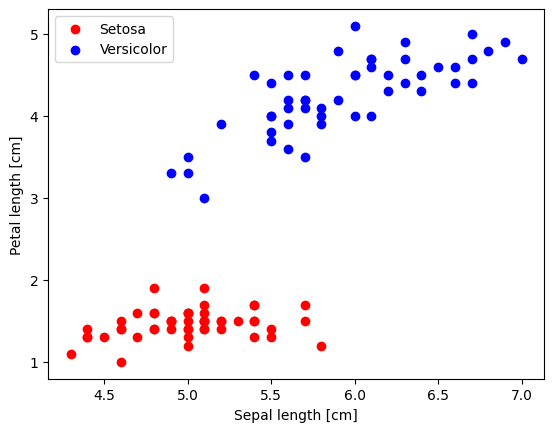

In [10]:
import matplotlib.pyplot as plt

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa',0,1)

# extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values

# plot data
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='o', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Train Perceptron Algorithm on Iris data subset

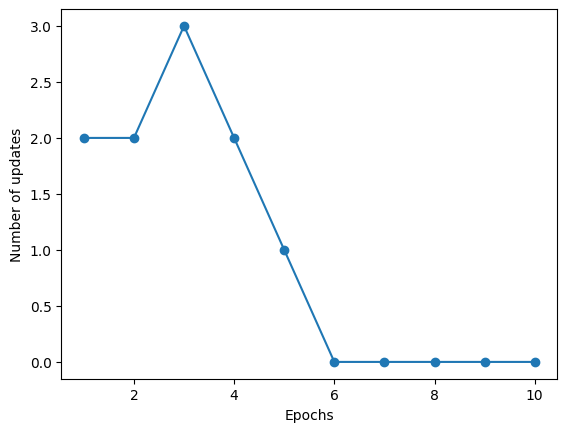

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Implement convenience function to visualize decision boundaries

In [20]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup market generator and color map
    markers = ('o','s','^','v','<')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                   y=X[y==cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=f'Class {cl}',
                   edgecolor='black')

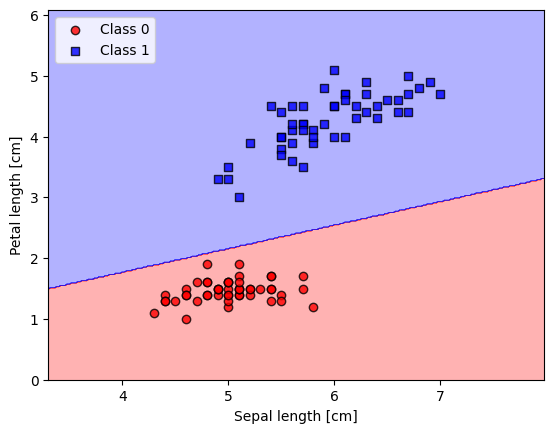

In [21]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### What is the purpose of a perceptron?

A `perceptron` is a fundamental building block of machine learning models, especially in the context of neural networks

#### Binary Classification

`Binary Classification`: A perceptron is primarily used for binary classification tasks. It takes multiple input features, applies weights to them, sums them up, and passes the result through an activation function (usually a step function) to produce a binary output (0 or 1).


#### Linear Decision Boundary

`Linear Decision Boundary`: The perceptron creates a linear decision boundary to separate data into two classes. It is suitable for linearly separable data, where a single straight line (in 2D) or a hyperplane (in higher dimensions) can separate the classes.


#### Building Block of Neural Networks

`Building Block of Neural Networks`: While a single perceptron is limited to linear classification, multiple perceptrons can be combined into layers to form multi-layer perceptrons (MLPs) or more complex neural networks. This allows the model to learn more complex, non-linear decision boundaries.

#### Learning Algorithm

The perceptron learning algorithm involves adjusting the weights based on the error of the prediction compared to the actual label. This is done using a process called gradient descent, specifically tailored for the perceptron to minimize the classification error.